# COLLEGE AND UNIVERSITIES

## Load Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation 

from sklearn.model_selection import train_test_split

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict

from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.feature_selection import RFECV

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve

from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.datasets import make_classification

from imblearn.over_sampling import SMOTE
from sklearn.utils import resample

## Data collection

### Colleges_and_Universities.csv

In [2]:
df = pd.read_csv('Colleges_and_Universities.csv')

df.head()

,X,Y,FID,IPEDSID,NAME,ADDRESS,ADDRESS2,CITY,STATE,ZIP,...,ALIAS,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY,SHELTER_ID
0,-92.260490,34.759308,7001,107840,Shorter College,604 Locust St,NOT AVAILABLE,N Little Rock,AR,72114,...,NOT AVAILABLE,-3,1,24,28,52,2,0,18,NOT AVAILABLE
1,-121.289431,38.713353,7002,112181,Citrus Heights Beauty College,7518 Baird Way,NOT AVAILABLE,Citris Heights,CA,95610,...,NOT AVAILABLE,-3,1,6,24,30,2,0,9,NOT AVAILABLE
2,-118.287070,34.101481,7003,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,NOT AVAILABLE,Los Angeles,CA,90027,...,NOT AVAILABLE,-3,1,0,24,24,2,0,11,NOT AVAILABLE
3,-121.652662,36.700631,7004,125310,Waynes College of Beauty,1271 North Main Street,NOT AVAILABLE,Salinas,CA,93906,...,NOT AVAILABLE,-3,1,18,16,34,2,0,9,NOT AVAILABLE
4,-71.070737,42.369930,7005,164368,Hult International Business School,1 Education Street,NOT AVAILABLE,Cambridge,MA,02141,...,NOT AVAILABLE,-3,2,0,2243,2243,2,0,143,NOT AVAILABLE


In [3]:
df.shape

(7735, 46)

In [4]:
df.dtypes

X             float64
Y             float64
FID             int64
IPEDSID         int64
NAME           object
ADDRESS        object
ADDRESS2       object
CITY           object
STATE          object
ZIP            object
ZIP4           object
TELEPHONE      object
TYPE            int64
STATUS         object
POPULATION      int64
COUNTY         object
COUNTYFIPS      int64
COUNTRY        object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
SOURCE         object
SOURCE_DAT     object
VAL_METHOD     object
VAL_DATE       object
WEBSITE        object
STFIPS          int64
COFIPS          int64
SECTOR          int64
LEVEL_          int64
HI_OFFER        int64
DEG_GRANT       int64
LOCALE          int64
CLOSE_DATE     object
MERGE_ID        int64
ALIAS          object
SIZE_SET        int64
INST_SIZE       int64
PT_ENROLL       int64
FT_ENROLL       int64
TOT_ENROLL      int64
HOUSING         int64
DORM_CAP        int64
TOT_EMPLOY      int64
SHELTER_ID

In [5]:
df.describe()

,X,Y,FID,IPEDSID,TYPE,POPULATION,COUNTYFIPS,LATITUDE,LONGITUDE,NAICS_CODE,...,LOCALE,MERGE_ID,SIZE_SET,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,HOUSING,DORM_CAP,TOT_EMPLOY
count,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,...,7735.000000,7735.00000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.00000,7735.00000,7735.000000
mean,-90.506517,37.425260,3868.000000,281864.075889,2.201034,3233.846800,29196.812023,37.425260,-90.506517,611360.962379,...,19.491920,424.98927,1.787977,1.577893,1032.233355,1727.344796,2759.578151,1.63245,388.18384,474.268649
std,17.595184,5.800367,2233.046499,131529.530737,0.842711,7826.541161,16713.057137,5.800367,17.595184,131.336865,...,9.381378,9463.44996,5.878855,1.077236,3006.886573,4790.666270,6695.364257,0.70059,1199.39176,1488.795583
min,-170.743175,-14.323171,1.000000,100636.000000,-3.000000,0.000000,-999.000000,-14.323171,-170.743175,611210.000000,...,-3.000000,-2.00000,-3.000000,-2.000000,0.000000,0.000000,0.000000,-2.00000,0.00000,0.000000
25%,-97.362353,33.990664,1934.500000,170270.500000,1.000000,140.000000,13121.000000,33.990664,-97.362353,611210.000000,...,12.000000,-2.00000,-3.000000,1.000000,0.000000,81.000000,114.000000,1.00000,0.00000,20.000000
50%,-86.663047,38.855847,3868.000000,222886.000000,2.000000,514.000000,29147.000000,38.855847,-86.663047,611310.000000,...,21.000000,-2.00000,-2.000000,1.000000,59.000000,318.000000,434.000000,2.00000,0.00000,74.000000
75%,-79.225690,41.392206,5801.500000,440314.000000,3.000000,2657.500000,42029.000000,41.392206,-79.225690,611511.000000,...,21.000000,-2.00000,5.000000,2.000000,600.000000,1415.000000,2232.500000,2.00000,105.00000,383.000000
max,171.378442,71.324702,7735.000000,480569.000000,3.000000,227548.000000,78030.000000,71.324702,171.378442,611710.000000,...,43.000000,443544.00000,18.000000,5.000000,65310.000000,204920.000000,204920.000000,2.00000,16018.00000,28018.000000


## Data Cleanning

### Step 1: Check if there is any missing data

**Are there any missing values?**

In [6]:
df.isnull().sum()

X             0
Y             0
FID           0
IPEDSID       0
NAME          0
ADDRESS       0
ADDRESS2      0
CITY          0
STATE         0
ZIP           0
ZIP4          0
TELEPHONE     0
TYPE          0
STATUS        0
POPULATION    0
COUNTY        0
COUNTYFIPS    0
COUNTRY       0
LATITUDE      0
LONGITUDE     0
NAICS_CODE    0
NAICS_DESC    0
SOURCE        0
SOURCE_DAT    0
VAL_METHOD    0
VAL_DATE      0
WEBSITE       0
STFIPS        0
COFIPS        0
SECTOR        0
LEVEL_        0
HI_OFFER      0
DEG_GRANT     0
LOCALE        0
CLOSE_DATE    0
MERGE_ID      0
ALIAS         0
SIZE_SET      0
INST_SIZE     0
PT_ENROLL     0
FT_ENROLL     0
TOT_ENROLL    0
HOUSING       0
DORM_CAP      0
TOT_EMPLOY    0
SHELTER_ID    0
dtype: int64

In [7]:
df.isnull().sum() * 100 / len(df)

X             0.0
Y             0.0
FID           0.0
IPEDSID       0.0
NAME          0.0
ADDRESS       0.0
ADDRESS2      0.0
CITY          0.0
STATE         0.0
ZIP           0.0
ZIP4          0.0
TELEPHONE     0.0
TYPE          0.0
STATUS        0.0
POPULATION    0.0
COUNTY        0.0
COUNTYFIPS    0.0
COUNTRY       0.0
LATITUDE      0.0
LONGITUDE     0.0
NAICS_CODE    0.0
NAICS_DESC    0.0
SOURCE        0.0
SOURCE_DAT    0.0
VAL_METHOD    0.0
VAL_DATE      0.0
WEBSITE       0.0
STFIPS        0.0
COFIPS        0.0
SECTOR        0.0
LEVEL_        0.0
HI_OFFER      0.0
DEG_GRANT     0.0
LOCALE        0.0
CLOSE_DATE    0.0
MERGE_ID      0.0
ALIAS         0.0
SIZE_SET      0.0
INST_SIZE     0.0
PT_ENROLL     0.0
FT_ENROLL     0.0
TOT_ENROLL    0.0
HOUSING       0.0
DORM_CAP      0.0
TOT_EMPLOY    0.0
SHELTER_ID    0.0
dtype: float64

### Step 2: Remove the irrelevant observations

**Drop the unnecessary data column**

In [8]:
df.drop(['X', 'Y', 'FID', 'ADDRESS2', 'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'SOURCE','SOURCE_DAT', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'COFIPS', 'SECTOR', 'LEVEL_','HI_OFFER', 'DEG_GRANT', 'LOCALE', 'CLOSE_DATE', 'MERGE_ID', 'ALIAS', 'SIZE_SET', 'HOUSING', 'DORM_CAP', 'SHELTER_ID'], inplace=True, axis=1)

## Describing the Data

In [9]:
df.shape

(7735, 20)

In [10]:
df.dtypes

IPEDSID         int64
NAME           object
ADDRESS        object
CITY           object
STATE          object
ZIP            object
POPULATION      int64
COUNTY         object
COUNTYFIPS      int64
COUNTRY        object
LATITUDE      float64
LONGITUDE     float64
NAICS_CODE      int64
NAICS_DESC     object
STFIPS          int64
INST_SIZE       int64
PT_ENROLL       int64
FT_ENROLL       int64
TOT_ENROLL      int64
TOT_EMPLOY      int64
dtype: object

In [11]:
df.describe()

,IPEDSID,POPULATION,COUNTYFIPS,LATITUDE,LONGITUDE,NAICS_CODE,STFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
count,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000,7735.000000
mean,281864.075889,3233.846800,29196.812023,37.425260,-90.506517,611360.962379,29.152165,1.577893,1032.233355,1727.344796,2759.578151,474.268649
std,131529.530737,7826.541161,16713.057137,5.800367,17.595184,131.336865,16.704485,1.077236,3006.886573,4790.666270,6695.364257,1488.795583
min,100636.000000,0.000000,-999.000000,-14.323171,-170.743175,611210.000000,1.000000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,170270.500000,140.000000,13121.000000,33.990664,-97.362353,611210.000000,13.000000,1.000000,0.000000,81.000000,114.000000,20.000000
50%,222886.000000,514.000000,29147.000000,38.855847,-86.663047,611310.000000,29.000000,1.000000,59.000000,318.000000,434.000000,74.000000
75%,440314.000000,2657.500000,42029.000000,41.392206,-79.225690,611511.000000,42.000000,2.000000,600.000000,1415.000000,2232.500000,383.000000
max,480569.000000,227548.000000,78030.000000,71.324702,171.378442,611710.000000,78.000000,5.000000,65310.000000,204920.000000,204920.000000,28018.000000


## Additional Dataset 

### co-est2021-alldata.csv

In [12]:
population = pd.read_csv('co-est2021-alldata.csv', encoding= 'unicode_escape')

In [13]:
population

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,...,RESIDUAL2021,GQESTIMATESBASE2020,GQESTIMATES2020,GQESTIMATES2021,RBIRTH2021,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021
0,40,3,6,1,0,Alabama,Alabama,5024279,5024803,5039877,...,242,114572,114572,114572,11.191613,12.890226,-1.698613,0.247201,4.398749,4.645950
1,50,3,6,1,1,Alabama,Autauga County,58805,58877,59095,...,8,442,442,442,11.002611,11.545112,-0.542502,0.084766,4.017903,4.102668
2,50,3,6,1,3,Alabama,Baldwin County,231767,233140,239294,...,-82,2177,2177,2177,9.567474,12.137145,-2.569671,0.266704,28.702422,28.969126
3,50,3,6,1,5,Alabama,Barbour County,25223,25180,24964,...,1,2789,2789,2789,10.928526,15.714742,-4.786216,0.039885,-3.908743,-3.868858
4,50,3,6,1,7,Alabama,Bibb County,22293,22223,22477,...,-1,2062,2062,2062,10.111857,12.617450,-2.505593,0.089485,13.825503,13.914989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3189,50,4,8,56,37,Wyoming,Sweetwater County,42272,42158,41614,...,-4,720,720,720,11.483551,9.549730,1.933820,0.429738,-15.255694,-14.825956
3190,50,4,8,56,39,Wyoming,Teton County,23331,23347,23575,...,1,215,215,215,9.377264,4.091897,5.285367,0.340991,4.049273,4.390265
3191,50,4,8,56,41,Wyoming,Uinta County,20450,20441,20635,...,0,187,187,187,11.003993,8.082579,2.921414,0.146071,6.378420,6.524491
3192,50,4,8,56,43,Wyoming,Washakie County,7685,7658,7705,...,-1,119,119,119,9.893901,14.971034,-5.077133,0.000000,11.325913,11.325913


In [14]:
population.dtypes

SUMLEV                     int64
REGION                     int64
DIVISION                   int64
STATE                      int64
COUNTY                     int64
STNAME                    object
CTYNAME                   object
ESTIMATESBASE2020          int64
POPESTIMATE2020            int64
POPESTIMATE2021            int64
NPOPCHG2020                int64
NPOPCHG2021                int64
BIRTHS2020                 int64
BIRTHS2021                 int64
DEATHS2020                 int64
DEATHS2021                 int64
NATURALCHG2020             int64
NATURALCHG2021             int64
INTERNATIONALMIG2020       int64
INTERNATIONALMIG2021       int64
DOMESTICMIG2020            int64
DOMESTICMIG2021            int64
NETMIG2020                 int64
NETMIG2021                 int64
RESIDUAL2020               int64
RESIDUAL2021               int64
GQESTIMATESBASE2020        int64
GQESTIMATES2020            int64
GQESTIMATES2021            int64
RBIRTH2021               float64
RDEATH2021

In [15]:
population.describe()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,NPOPCHG2020,NPOPCHG2021,...,RESIDUAL2021,GQESTIMATESBASE2020,GQESTIMATES2020,GQESTIMATES2021,RBIRTH2021,RDEATH2021,RNATURALCHG2021,RINTERNATIONALMIG2021,RDOMESTICMIG2021,RNETMIG2021
count,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3.194000e+03,3.194000e+03,3.194000e+03,3194.000000,3194.000000,...,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000,3194.000000
mean,49.840326,2.669067,5.192549,30.250157,101.845335,2.075449e+05,2.075774e+05,2.078233e+05,32.435191,245.876644,...,0.000000,4859.648716,4859.648716,4859.648716,10.476861,12.679550,-2.202689,0.346609,4.977854,5.324463
std,1.253691,0.807730,1.974832,15.159773,107.576954,1.269954e+06,1.269952e+06,1.269011e+06,2217.319165,12021.429239,...,125.328544,28286.520532,28286.520532,28286.520532,2.396415,3.293721,4.349472,0.700890,14.365999,14.258942
min,40.000000,1.000000,1.000000,1.000000,0.000000,6.400000e+01,6.700000e+01,5.700000e+01,-46316.000000,-319020.000000,...,-3645.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.258065,-1.295197,-112.903226,-112.903226
25%,50.000000,2.000000,4.000000,18.000000,33.000000,1.097425e+04,1.092850e+04,1.094275e+04,-52.750000,-75.000000,...,-2.000000,139.000000,139.000000,139.000000,9.108967,10.558537,-4.908418,0.000000,-2.475981,-2.169724
50%,50.000000,3.000000,5.000000,29.000000,77.000000,2.657950e+04,2.653750e+04,2.641100e+04,-13.000000,32.500000,...,1.000000,553.500000,553.500000,553.500000,10.371332,12.778106,-2.327026,0.147322,3.796239,4.193642
75%,50.000000,3.000000,7.000000,45.000000,133.000000,7.408775e+04,7.390850e+04,7.400625e+04,20.000000,312.750000,...,5.000000,2288.500000,2288.500000,2288.500000,11.658382,14.810587,0.249733,0.426908,11.860913,12.157585
max,50.000000,4.000000,9.000000,56.000000,840.000000,3.953822e+07,3.949974e+07,3.923784e+07,72148.000000,310288.000000,...,1285.000000,815696.000000,815696.000000,815696.000000,29.072202,48.387097,19.022552,17.299737,80.717489,80.717489


## Data Cleaning

### Step 1: Check if there is any missing data

**Are there any missing values?**

In [16]:
population.isnull().sum()

SUMLEV                   0
REGION                   0
DIVISION                 0
STATE                    0
COUNTY                   0
STNAME                   0
CTYNAME                  0
ESTIMATESBASE2020        0
POPESTIMATE2020          0
POPESTIMATE2021          0
NPOPCHG2020              0
NPOPCHG2021              0
BIRTHS2020               0
BIRTHS2021               0
DEATHS2020               0
DEATHS2021               0
NATURALCHG2020           0
NATURALCHG2021           0
INTERNATIONALMIG2020     0
INTERNATIONALMIG2021     0
DOMESTICMIG2020          0
DOMESTICMIG2021          0
NETMIG2020               0
NETMIG2021               0
RESIDUAL2020             0
RESIDUAL2021             0
GQESTIMATESBASE2020      0
GQESTIMATES2020          0
GQESTIMATES2021          0
RBIRTH2021               0
RDEATH2021               0
RNATURALCHG2021          0
RINTERNATIONALMIG2021    0
RDOMESTICMIG2021         0
RNETMIG2021              0
dtype: int64

In [17]:
population.isnull().sum() * 100 / len(population)

SUMLEV                   0.0
REGION                   0.0
DIVISION                 0.0
STATE                    0.0
COUNTY                   0.0
STNAME                   0.0
CTYNAME                  0.0
ESTIMATESBASE2020        0.0
POPESTIMATE2020          0.0
POPESTIMATE2021          0.0
NPOPCHG2020              0.0
NPOPCHG2021              0.0
BIRTHS2020               0.0
BIRTHS2021               0.0
DEATHS2020               0.0
DEATHS2021               0.0
NATURALCHG2020           0.0
NATURALCHG2021           0.0
INTERNATIONALMIG2020     0.0
INTERNATIONALMIG2021     0.0
DOMESTICMIG2020          0.0
DOMESTICMIG2021          0.0
NETMIG2020               0.0
NETMIG2021               0.0
RESIDUAL2020             0.0
RESIDUAL2021             0.0
GQESTIMATESBASE2020      0.0
GQESTIMATES2020          0.0
GQESTIMATES2021          0.0
RBIRTH2021               0.0
RDEATH2021               0.0
RNATURALCHG2021          0.0
RINTERNATIONALMIG2021    0.0
RDOMESTICMIG2021         0.0
RNETMIG2021   

No missing data (NaN)

### Step 2: Get desired observations for further analysis

**Get the necessary data columns**

In [18]:
population = population[['STATE', 'COUNTY', 'POPESTIMATE2021']]

In [19]:
population

,STATE,COUNTY,POPESTIMATE2021
0,1,0,5039877
1,1,1,59095
2,1,3,239294
3,1,5,24964
4,1,7,22477
...,...,...,...
3189,56,37,41614
3190,56,39,23575
3191,56,41,20635
3192,56,43,7705


## Describing the Data

In [20]:
population.shape

(3194, 3)

In [21]:
population.dtypes

STATE              int64
COUNTY             int64
POPESTIMATE2021    int64
dtype: object

In [22]:
population.describe()

,STATE,COUNTY,POPESTIMATE2021
count,3194.000000,3194.000000,3.194000e+03
mean,30.250157,101.845335,2.078233e+05
std,15.159773,107.576954,1.269011e+06
min,1.000000,0.000000,5.700000e+01
25%,18.000000,33.000000,1.094275e+04
50%,29.000000,77.000000,2.641100e+04
75%,45.000000,133.000000,7.400625e+04
max,56.000000,840.000000,3.923784e+07


In [23]:
population.nunique()

STATE                51
COUNTY              326
POPESTIMATE2021    3142
dtype: int64

## Data Transformation

### Normalization

Data before normalization is performed on the data:

In [24]:
df[['POPULATION', 'LATITUDE', 'LONGITUDE', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL', 'TOT_ENROLL', 'TOT_EMPLOY']]

,POPULATION,LATITUDE,LONGITUDE,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
0,70,34.759308,-92.260490,1,24,28,52,18
1,39,38.713353,-121.289431,1,6,24,30,9
2,35,34.101481,-118.287070,1,0,24,24,11
3,43,36.700631,-121.652662,1,18,16,34,9
4,2386,42.369930,-71.070737,2,0,2243,2243,143
...,...,...,...,...,...,...,...,...
7730,163,41.347074,-72.042638,1,119,19,138,25
7731,3470,39.482878,-80.160335,2,772,2415,3187,283
7732,0,33.895708,-118.236350,1,0,0,0,0
7733,752,34.042875,-84.176526,1,227,441,668,84


Data after normalization is performed on the data:

In [25]:
sc = MinMaxScaler(feature_range = (0, 1))
df_min_max_scaled = df.copy()
#fit: get min/max of train data
col_list = [col for col in df.columns.tolist() if df[col].dtype.name != "object"]

df_min_max_scaled[col_list] = sc.fit_transform(df[col_list])
df_min_max_scaled[['POPULATION', 'LATITUDE', 'LONGITUDE', 'INST_SIZE', 'PT_ENROLL', 'FT_ENROLL', 'TOT_ENROLL', 'TOT_EMPLOY']]

,POPULATION,LATITUDE,LONGITUDE,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY
0,0.000308,0.573073,0.229400,0.428571,0.000367,0.000137,0.000254,0.000642
1,0.000171,0.619239,0.144550,0.428571,0.000092,0.000117,0.000146,0.000321
2,0.000154,0.565392,0.153326,0.428571,0.000000,0.000117,0.000117,0.000393
3,0.000189,0.595739,0.143488,0.428571,0.000276,0.000078,0.000166,0.000321
4,0.010486,0.661932,0.291336,0.571429,0.000000,0.010946,0.010946,0.005104
...,...,...,...,...,...,...,...,...
7730,0.000716,0.649990,0.288495,0.428571,0.001822,0.000093,0.000673,0.000892
7731,0.015250,0.628224,0.264768,0.571429,0.011821,0.011785,0.015552,0.010101
7732,0.000000,0.562990,0.153474,0.428571,0.000000,0.000000,0.000000,0.000000
7733,0.003305,0.564708,0.253029,0.428571,0.003476,0.002152,0.003260,0.002998


### Merging

Merging is the process of combining two or more datasets into a single dataset. 
<br><br>
In our datasets, outer merging is performed to allow us to unify and better understand the data when analyzing it.

In [26]:
df_merge = df.copy()

In [27]:
population.rename(columns={"STATE": "STFIPS", "COUNTY": "COFIPS"}, inplace=True)
population

,STFIPS,COFIPS,POPESTIMATE2021
0,1,0,5039877
1,1,1,59095
2,1,3,239294
3,1,5,24964
4,1,7,22477
...,...,...,...
3189,56,37,41614
3190,56,39,23575
3191,56,41,20635
3192,56,43,7705


In [28]:
df_merge = df_merge.merge(population, how='left')
df_merge

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,COFIPS,POPESTIMATE2021
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,1,24,28,52,18,0.0,3025891.0
1,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,1,24,28,52,18,1.0,16722.0
2,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,1,24,28,52,18,3.0,18674.0
3,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,1,24,28,52,18,5.0,42144.0
4,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,1,24,28,52,18,7.0,293692.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623254,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,611210,Junior Colleges,39,1,221,263,484,83,167.0,59423.0
623255,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,611210,Junior Colleges,39,1,221,263,484,83,169.0,116710.0
623256,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,611210,Junior Colleges,39,1,221,263,484,83,171.0,36716.0
623257,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,611210,Junior Colleges,39,1,221,263,484,83,173.0,132472.0


In [29]:
df_merge.isnull().sum()

IPEDSID              0
NAME                 0
ADDRESS              0
CITY                 0
STATE                0
ZIP                  0
POPULATION           0
COUNTY               0
COUNTYFIPS           0
COUNTRY              0
LATITUDE             0
LONGITUDE            0
NAICS_CODE           0
NAICS_DESC           0
STFIPS               0
INST_SIZE            0
PT_ENROLL            0
FT_ENROLL            0
TOT_ENROLL           0
TOT_EMPLOY           0
COFIPS             170
POPESTIMATE2021    170
dtype: int64

In [30]:
df_merge.dropna(inplace=True)

In [31]:
df_merge['POPESTIMATE2021'] = (df_merge['POPESTIMATE2021'].to_numpy()[:, None] * 0.072)
df_merge['POPESTIMATE2021'] = df_merge['POPESTIMATE2021'].astype(int)

### Binning

Bining is a process of grouping or categorizing numeric data into discrete bins or discrete baskets, which is one of the ways of dealing with noisy data.
<br><br>
In this data, binning is performed on the ‘TOT_ENROLL’ variable, and we bin it into 3 bins, which are ‘Low’, ‘Medium’, and ‘High’ to simplify the analysis.

In [32]:
df_min_max_scaled['TOT_ENROLL'].dtype

dtype('float64')

In order to get an idea on how the values are distributed, we use matplotlib library to plot the histogram.

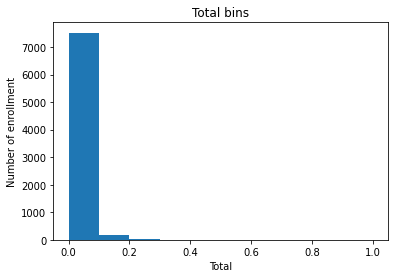

In [33]:
plt.hist(df_min_max_scaled['TOT_ENROLL'])

# set x/y labels and plot title
plt.xlabel('Total')
plt.ylabel('Number of enrollment')
plt.title('Total bins').figure.savefig('TotalEnroll_Histogram.png')

We want 3 bins of equal size, therefore we use Numpy's `linspace(start_value, end_value, numbers_generated)` function. 
<br><br>
In order to build 3 bins, we need to define 4 dividers or boundaries:

In [34]:
bins = np.linspace(min(df['TOT_ENROLL']), max(df['TOT_ENROLL']), 4)
bins

array([     0.        ,  68306.66666667, 136613.33333333, 204920.        ])

So these are the dividers of the 3 bins, if we were to give it the starting value, ending value, and the number of values to be generated at equal intervals.

The bin group names is created as shown below:

In [35]:
group_names = ['Low', 'Medium', 'High']

In [36]:
df['BINNED_TOT_ENROLL'] = pd.cut(df['TOT_ENROLL'], bins, labels=group_names, include_lowest=True )
df[['TOT_ENROLL','BINNED_TOT_ENROLL']].head()

,TOT_ENROLL,BINNED_TOT_ENROLL
0,52,Low
1,30,Low
2,24,Low
3,34,Low
4,2243,Low


In [37]:
df['BINNED_TOT_ENROLL'].value_counts()

Low       7730
Medium       4
High         1
Name: BINNED_TOT_ENROLL, dtype: int64

In [38]:
df['BINNED_TOT_ENROLL'] = df['BINNED_TOT_ENROLL'].astype(str)

In order to get an idea on how the values are distributed, we use matplotlib library to plot the histogram.

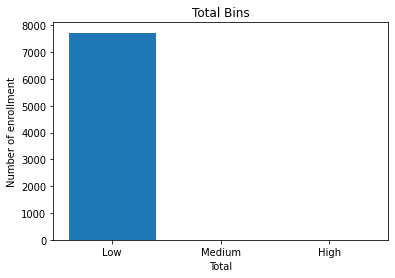

In [39]:
plt.bar(group_names, df['BINNED_TOT_ENROLL'].value_counts())

# set x/y labels and plot title 
plt.xlabel('Total')
plt.ylabel('Number of enrollment')
plt.title('Total Bins').figure.savefig('Binned_Enrollment.png')

## Data Transformation

### Clustering

In [40]:
x = df[['LONGITUDE', 'LATITUDE']]
ss = StandardScaler()
X = ss.fit_transform(x)

print(X) 

[[-0.09969125 -0.45964748]
 [-1.74962101  0.22208539]
 [-1.57897459 -0.57306609]
 ...
 [-1.5760918  -0.60854424]
 [ 0.35978031 -0.58317059]
 [ 0.41973224  0.44922468]]


In [41]:
model = KMeans(n_clusters = 3, verbose=0)   #build the model
model.fit(X)

KMeans(n_clusters=3)

In [42]:
kmeans_labels = pd.DataFrame(model.labels_)   # put into a DataFrame. We will use this shortly...
kmeans_labels

,0
0,2
1,0
2,0
3,0
4,1
...,...
7730,1
7731,1
7732,0
7733,2


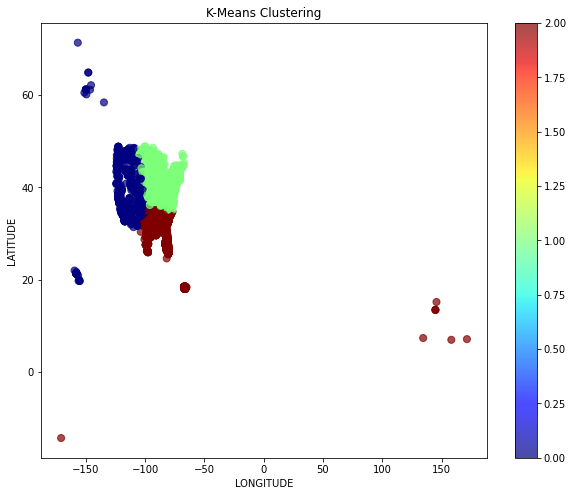

In [43]:
def plot_kmeans_scatter(v1, v2):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(v1, v2, c=kmeans_labels[0],s=50,cmap='jet',alpha=0.7)
    ax.set_title('K-Means Clustering')
    ax.set_xlabel(v1.name)
    ax.set_ylabel(v2.name)
    plt.colorbar(scatter)
    plt.show()
    ax.figure.savefig('K-Means.png')

v1 = df['LONGITUDE']
v2 = df['LATITUDE']
plot_kmeans_scatter(v1, v2)

## Exploratory Data Analysis

### Descriptive Question

**“What is the maximum number of part-time enrollment and full-time enrollment of students of colleges and universities in the US?”**

In [44]:
max_pt = df['PT_ENROLL'].max()
max_ft = df['FT_ENROLL'].max()
print('Max number of part-time enrollment:', max_pt)
print('Max number of full-time enrollment:', max_ft)

Max number of part-time enrollment: 65310
Max number of full-time enrollment: 204920


### Exploratory Question

**“What is the relationship between the population and the total enrollment of the colleges and universities students in the US?”**

**Data Visualization**

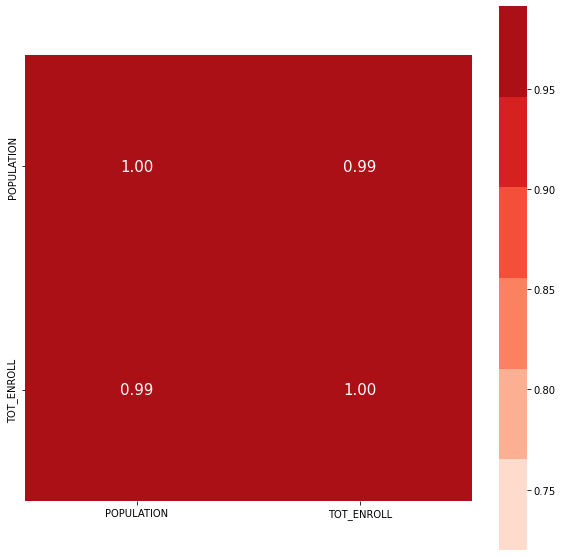

In [45]:
corr_list = list(['POPULATION', 'TOT_ENROLL'])
corr = df[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap.png')

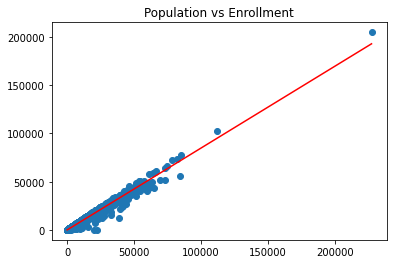

In [46]:
plt.scatter(df['POPULATION'],df['TOT_ENROLL'])
plt.plot(np.unique(df['POPULATION']), np.poly1d(np.polyfit(df['POPULATION'], df['TOT_ENROLL'], 1))
         (np.unique(df['POPULATION'])), color='red')
plt.title('Population vs Enrollment').figure.savefig('Population_vs_Enrollment_Regplot_All.png')

### Inferential Question

**“The larger population of the state is linked with a higher total enrollment of college or university. Is this hypothesis also true for the California population?”**

In [47]:
df1 = df.copy()

In [48]:
filter = df1['STATE'] == 'CA'
df1 = df1[filter]
df1.head()

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,LONGITUDE,NAICS_CODE,NAICS_DESC,STFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,-121.289431,611511,Cosmetology and Barber Schools,6,1,6,24,30,9,Low
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,-118.287070,611511,Cosmetology and Barber Schools,6,1,0,24,24,11,Low
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,-121.652662,611511,Cosmetology and Barber Schools,6,1,18,16,34,9,Low
9,395195,Colton-Redlands-Yucaipa Regional Occupational ...,1214 Indiana Ct,Redlands,CA,92374,231,San Bernardino,6071,US,...,-117.204959,611519,Other Technical and Trade Schools,6,1,0,142,142,89,Low
14,475097,International Culinary Center-California,700 West Hamilton Avenue,Campbell,CA,95008,123,Santa Clara,6085,US,...,-121.961475,611519,Other Technical and Trade Schools,6,1,20,54,74,49,Low


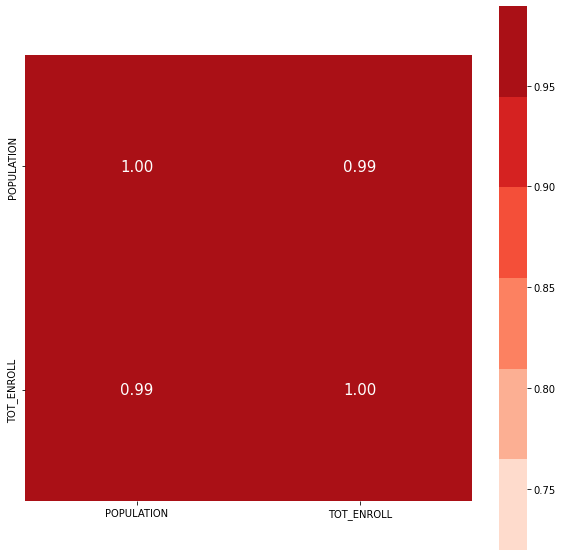

In [49]:
corr_list = list(['POPULATION', 'TOT_ENROLL'])
corr = df1[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap1.png')

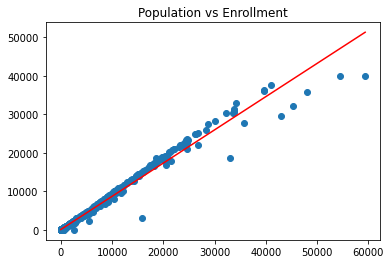

In [50]:
plt.scatter(df1['POPULATION'],df1['TOT_ENROLL'])
plt.plot(np.unique(df1['POPULATION']), np.poly1d(np.polyfit(df1['POPULATION'], df1['TOT_ENROLL'], 1))
         (np.unique(df1['POPULATION'])), color='red')
plt.title('Population vs Enrollment').figure.savefig('Population_vs_Enrollment_Regplot_CA.png')

### Predictive Question

**“What is the predicted mean of the total enrolled students in the junior colleges by the end of 2021?”**

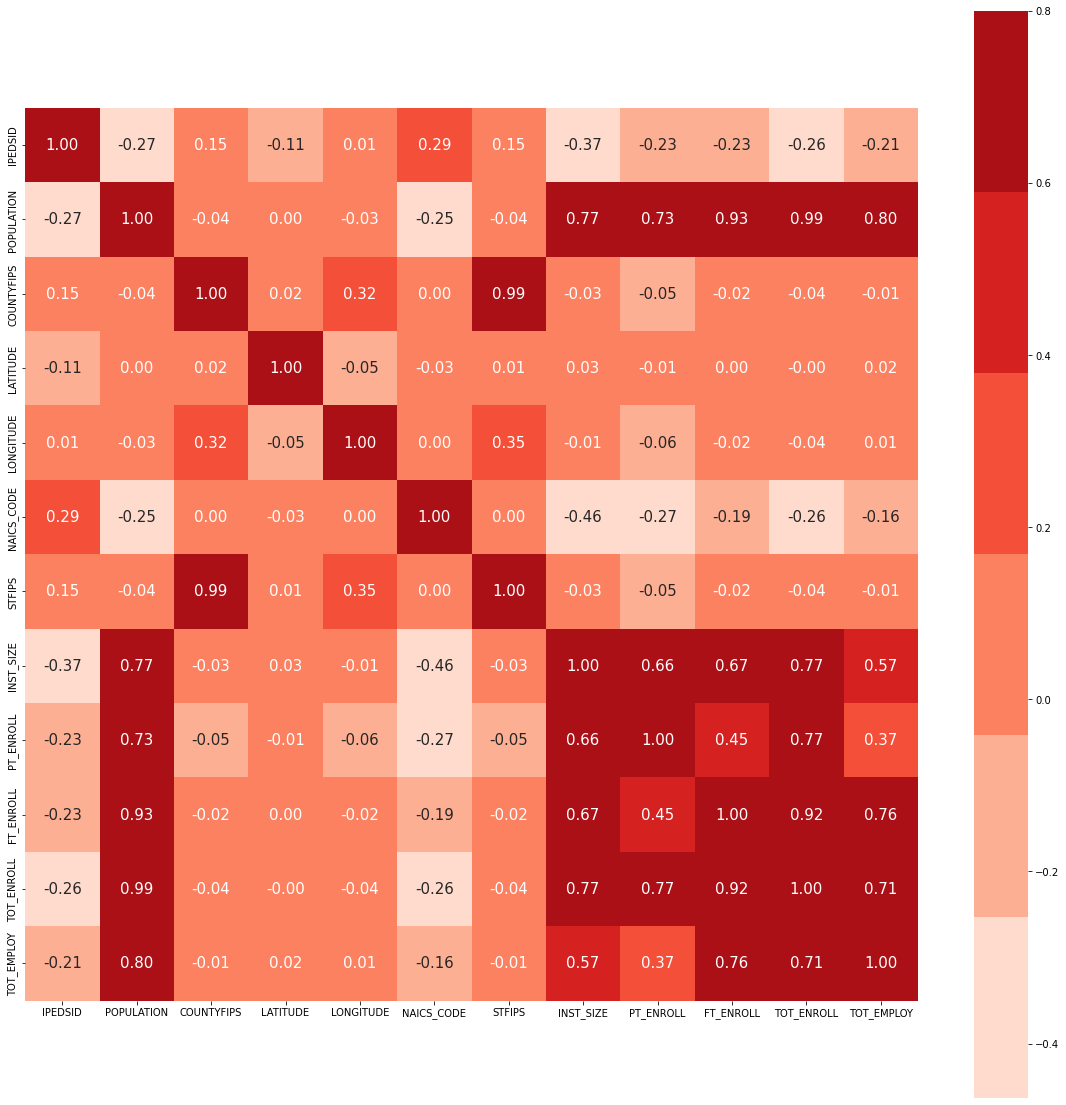

In [51]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap2.png')

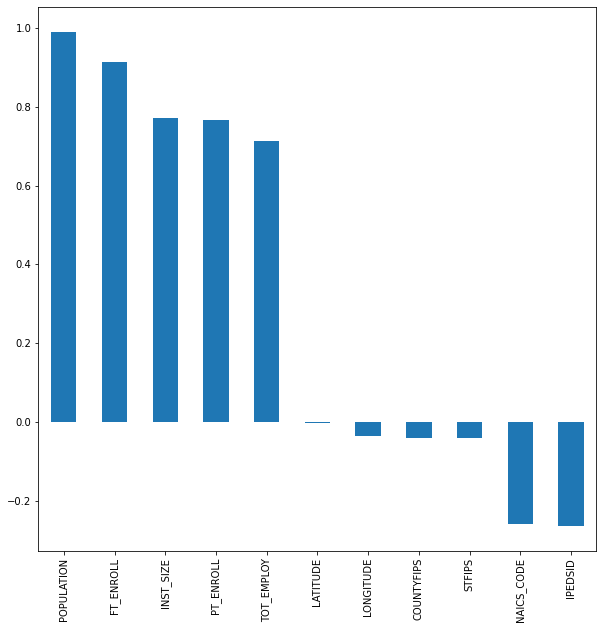

In [52]:
corr_with_enroll = df.corr()["TOT_ENROLL"].sort_values(ascending=False)
plt.figure(figsize=(10,10))
corr_with_enroll.drop("TOT_ENROLL").plot.bar().figure.savefig('Correlation_Bar.png')
plt.show()

In [53]:
df_junior = df_merge.copy()

In [54]:
filter = df_junior['NAICS_DESC'] == 'Junior Colleges'
df_junior = df_junior[filter]
df_junior

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,NAICS_CODE,NAICS_DESC,STFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,COFIPS,POPESTIMATE2021
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,1,24,28,52,18,0.0,217864
1,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,1,24,28,52,18,1.0,1203
2,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,1,24,28,52,18,3.0,1344
3,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,1,24,28,52,18,5.0,3034
4,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,611210,Junior Colleges,5,1,24,28,52,18,7.0,21145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623254,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,611210,Junior Colleges,39,1,221,263,484,83,167.0,4278
623255,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,611210,Junior Colleges,39,1,221,263,484,83,169.0,8403
623256,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,611210,Junior Colleges,39,1,221,263,484,83,171.0,2643
623257,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,611210,Junior Colleges,39,1,221,263,484,83,173.0,9537


### Regression

### Split train-test dataset

In [55]:
X = df[['POPULATION']]
Y = df[['TOT_ENROLL']]

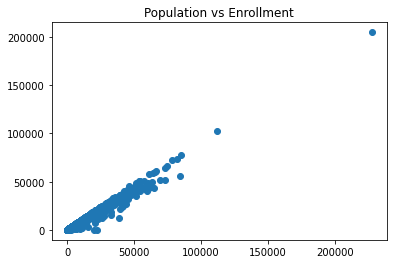

In [56]:
plt.plot(X,Y, linestyle='',marker='o')
plt.title('Population vs Enrollment').figure.savefig('Population_vs_Enrollment.png')

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

### Create Linear Regression model

In [58]:
lm = LinearRegression()
lm.fit(X_train, y_train)
Y_test_pred = lm.predict(X_test)
Y_train_pred = lm.predict(X_train)

print('Train r2 score: ', r2_score(Y_train_pred, y_train))
print('Test r2 score: ', r2_score(y_test, Y_test_pred)) 
print('Train MAE: ', mean_absolute_error(Y_train_pred, y_train))
print('Test MAE: ',mean_absolute_error(y_test, Y_test_pred))

Train r2 score:  0.9819861144001455
Test r2 score:  0.9816923218118879
Train MAE:  231.5494600903543
Test MAE:  229.86777539443798


### Create Decision Tree Regression model

In [59]:
dtr1 = DecisionTreeRegressor(max_depth=7)
dtr1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [60]:
y_pred2 = dtr1.predict(X_test)
dtr1_mae = mean_absolute_error(y_test, y_pred2)
dtr1_mae

263.48660348367974

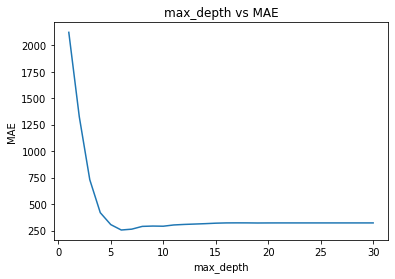

In [61]:
depth = 30
max_depth = [i for i in range(1,depth+1)] 
dtr_mae = [] 
for i in range(1,depth+1):
    dtr = DecisionTreeRegressor(max_depth=i)
    dtr.fit(X_train, y_train)
    dtr_y_pred = dtr.predict(X_test)
    dtr_mae.append(mean_absolute_error(y_test, dtr_y_pred))
    
plt.plot(max_depth, dtr_mae)
plt.xlabel('max_depth')
plt.ylabel('MAE')
plt.title('max_depth vs MAE').figure.savefig('DTR.png')
plt.show()

### Data visualization for prediction of regression model

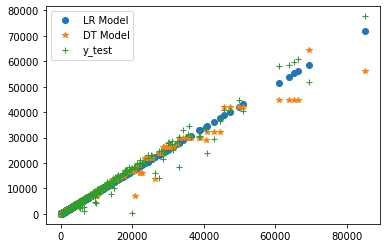

In [62]:
plt.plot(X_test,Y_test_pred, linestyle='',marker='o', label='LR Model')
plt.plot(X_test,y_pred2, linestyle='',marker='*', label='DT Model')
plt.plot(X_test,y_test, linestyle='',marker='+', label='y_test')
plt.ticklabel_format(style='plain')
plt.legend().figure.savefig('Predicted_Enrollment.png')

### Data Merging

Merge with estimated 2021 population in US dataset called "co-est2021-alldata.csv"

In [63]:
#population = pd.read_csv('co-est2021-alldata.csv', encoding= 'unicode_escape')
#population = population[['STATE', 'COUNTY', 'POPESTIMATE2021']]
#population.rename(columns={"STATE": "STFIPS", "COUNTY": "COFIPS"}, inplace=True)
#df_new = df_new.merge(population, how='left')
#df_new.dropna(subset=['POPESTIMATE2021'], inplace=True)
#df_new['POPESTIMATE2021'] = (df_new['POPESTIMATE2021'].to_numpy()[:, None] * 0.072)
#df_new['POPESTIMATE2021'] = df_new['POPESTIMATE2021'].astype(int)
#df_new

In [64]:
real_X = df_junior[['POPESTIMATE2021']]
real_X

,POPESTIMATE2021
0,217864
1,1203
2,1344
3,3034
4,21145
...,...
623254,4278
623255,8403
623256,2643
623257,9537


### Model prediction 

In [65]:
lm_y_pred = lm.predict(real_X)
drt_y_pred = dtr1.predict(real_X)
lm_y_pred = pd.DataFrame(lm_y_pred, columns=['LR'])
drt_y_pred = pd.DataFrame(drt_y_pred, columns=['DT'])

In [66]:
lm_y_pred = lm_y_pred.astype(int)
drt_y_pred = drt_y_pred.astype(int)

In [67]:
df_new = pd.concat([df_junior.reset_index(drop=True), lm_y_pred, drt_y_pred], axis=1) 

df_new

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,STFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,COFIPS,POPESTIMATE2021,LR,DT
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,5,1,24,28,52,18,0.0,217864,184212,204920
1,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,5,1,24,28,52,18,1.0,1203,1039,1004
2,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,5,1,24,28,52,18,3.0,1344,1158,1145
3,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,5,1,24,28,52,18,5.0,3034,2587,2594
4,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,5,1,24,28,52,18,7.0,21145,17899,19147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174255,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,39,1,221,263,484,83,167.0,4278,3639,3855
174256,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,39,1,221,263,484,83,169.0,8403,7126,7339
174257,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,39,1,221,263,484,83,171.0,2643,2257,2282
174258,443535,ITT Technical Institute-Hilliard,"3781 Park Mill Run, Suite 1",Hilliard,OH,43026,567,Franklin,39049,US,...,39,1,221,263,484,83,173.0,9537,8085,8372


### Data visualization

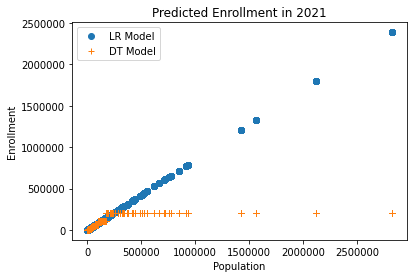

In [68]:
plt.plot(df_new['POPESTIMATE2021'],df_new['LR'], linestyle='',marker='o', label='LR Model')
plt.plot(df_new['POPESTIMATE2021'],df_new['DT'], linestyle='',marker='+', label='DT Model')
plt.xlabel('Population')
plt.ylabel('Enrollment')
plt.title('Predicted Enrollment in 2021')
plt.ticklabel_format(style='plain')
plt.legend().figure.savefig('Predicted_Enrollment_2021.png')

In [69]:
print('DT mean: ', df_new['DT'].mean())
print('LR mean: ', df_new['LR'].mean())

DT mean:  11278.106134511649
LR mean:  19340.342832549064


## Classification

In [70]:
df_FS = df.copy()

### Binning for repsonse variable

In [71]:
bins = np.linspace(min(df_FS['TOT_ENROLL']), max(df_FS['TOT_ENROLL']), 4)

In [72]:
group_names = ['Low', 'Medium', 'High']

In [73]:
df_FS['BINNED_TOT_ENROLL'] = pd.cut(df_FS['TOT_ENROLL'], bins, labels=group_names, include_lowest=True )
df_FS.head()

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,LONGITUDE,NAICS_CODE,NAICS_DESC,STFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,-92.260490,611210,Junior Colleges,5,1,24,28,52,18,Low
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,-121.289431,611511,Cosmetology and Barber Schools,6,1,6,24,30,9,Low
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,-118.287070,611511,Cosmetology and Barber Schools,6,1,0,24,24,11,Low
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,-121.652662,611511,Cosmetology and Barber Schools,6,1,18,16,34,9,Low
4,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,2386,Middlesex,25017,US,...,-71.070737,611310,"Colleges, Universities, and Professional Schools",25,2,0,2243,2243,143,Low


In [74]:
df_FS.drop(columns=['TOT_ENROLL'], inplace=True)

### Label Encoding 

In [75]:
d = defaultdict(LabelEncoder)

df_FS = df_FS.apply(lambda x: d[x.name].fit_transform(x))
df_FS

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,LATITUDE,LONGITUDE,NAICS_CODE,NAICS_DESC,STFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,200,5846,5743,1478,2,3459,70,764,78,7,2328,2843,0,7,3,2,24,28,18,1
1,302,1326,6402,410,5,4638,39,808,107,7,3783,439,4,3,4,2,6,24,9,1
2,395,3300,1874,1250,5,4231,35,560,96,7,2092,696,4,3,4,2,0,24,11,1
3,606,7324,1083,1941,5,4520,43,640,101,7,3056,392,4,3,4,2,18,16,9,1
4,1747,2899,28,313,22,151,1547,623,542,7,6556,7455,1,1,21,3,0,1587,143,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7730,6005,1574,756,890,7,316,163,666,157,7,5765,7274,6,8,6,2,119,19,25,1
7731,6006,5073,908,707,57,1241,1910,588,1426,7,4244,5569,0,7,48,3,641,1651,282,1
7732,6007,6721,6258,464,5,4255,0,560,96,7,1842,721,8,4,4,2,0,0,0,1
7733,6008,2947,484,602,12,1489,725,345,230,7,1974,4400,1,1,10,2,225,436,84,1


In [76]:
y = df_FS.BINNED_TOT_ENROLL
X = df_FS.drop("BINNED_TOT_ENROLL", 1)
colnames = X.columns

### Feature Selection using Boruta

In [77]:
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [78]:
rf = RandomForestClassifier(n_jobs=-1, class_weight="balanced", max_depth=5)

feat_selector = BorutaPy(rf, n_estimators="auto", random_state=1)

In [79]:
feat_selector.fit(X.values, y.values.ravel())

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=5,
                                          n_estimators=69, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x1FA5E356C40),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x1FA5E356C40)

In [80]:
boruta_score = ranking(list(map(float, feat_selector.ranking_)), colnames, order=-1)
boruta_score = pd.DataFrame(list(boruta_score.items()), columns=['Features', 'Score'])
boruta_score = boruta_score.sort_values("Score", ascending = False)

In [81]:
print('---------Top 10----------')
display(boruta_score.head(10))

print('---------Bottom 10----------')
boruta_score.tail(10)

---------Top 10----------


,Features,Score
18,TOT_EMPLOY,1.00
6,POPULATION,1.00
17,FT_ENROLL,1.00
16,PT_ENROLL,1.00
15,INST_SIZE,1.00
1,NAME,0.93
0,IPEDSID,0.86
8,COUNTYFIPS,0.79
14,STFIPS,0.71
4,STATE,0.71


---------Bottom 10----------


,Features,Score
4,STATE,0.71
11,LONGITUDE,0.57
2,ADDRESS,0.50
10,LATITUDE,0.43
13,NAICS_DESC,0.43
7,COUNTY,0.21
5,ZIP,0.21
3,CITY,0.21
12,NAICS_CODE,0.07
9,COUNTRY,0.00


Text(0.5, 1.0, 'Boruta Top 10 Features')

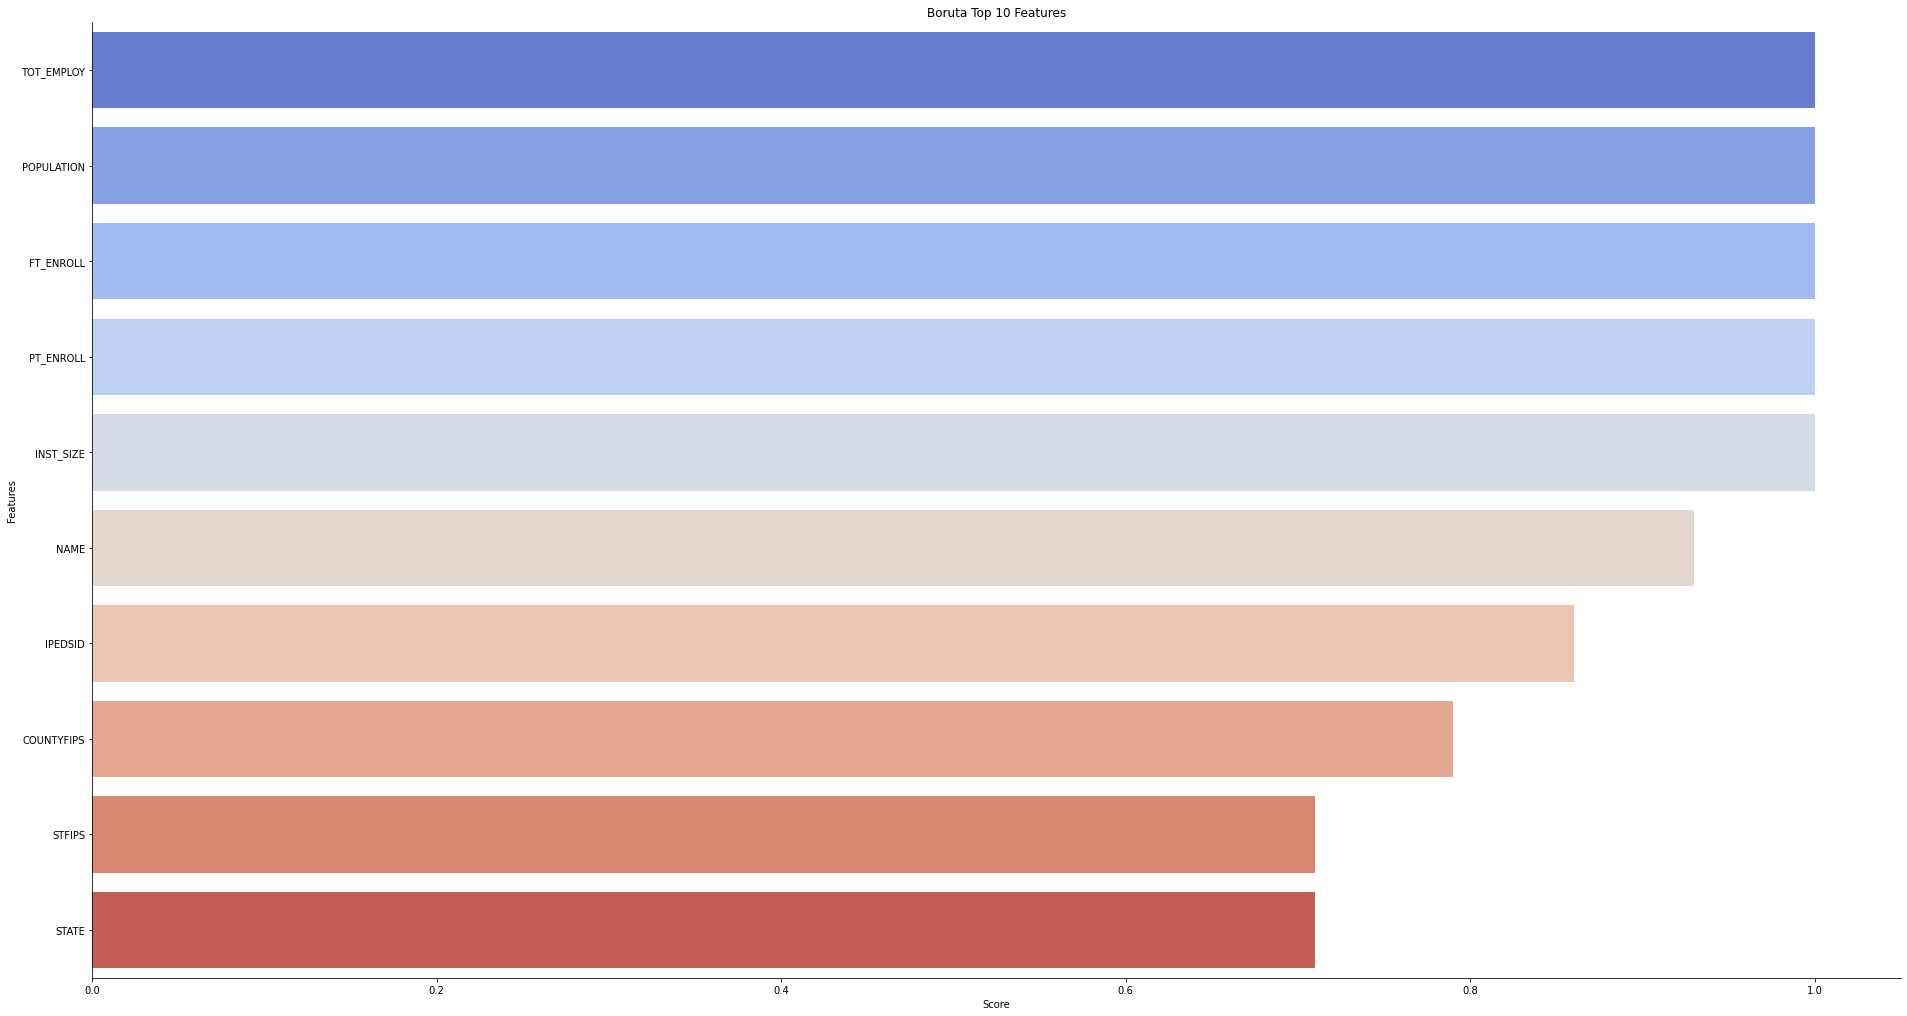

In [82]:
sns_boruta_plot = sns.catplot(x="Score", y="Features", data = boruta_score[:10], kind = "bar", 
               height=14, aspect=1.9, palette='coolwarm')
plt.title("Boruta Top 10 Features")

In [83]:
top_10_features = boruta_score.Features[:10].tolist()

In [84]:
df_FS['BINNED_TOT_ENROLL'].value_counts()

1    7730
2       4
0       1
Name: BINNED_TOT_ENROLL, dtype: int64

### Balance dataset using resample

In [85]:
#create two different dataframe of majority and minority class 
df_majority = df_FS[(df_FS['BINNED_TOT_ENROLL']==1)] 
df_minority = df_FS[(df_FS['BINNED_TOT_ENROLL']==0)]
df_minority1 = df_FS[(df_FS['BINNED_TOT_ENROLL']==2)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 7730, # to match majority class
                                 random_state=42)  # reproducible results
df_minority_upsampled1 = resample(df_minority1, 
                                 replace=True,    # sample with replacement
                                 n_samples= 7730, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_FS = pd.concat([df_minority_upsampled, df_majority])
df_FS = pd.concat([df_minority_upsampled1, df_FS])

In [86]:
y = df_FS.BINNED_TOT_ENROLL
X = df_FS[top_10_features]

### Split train-test dataset

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10) 

### Create Naive Bayes Classifier

In [88]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(nb.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(nb.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)
    
prob_NB = nb.predict_proba(X_test)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=nb.predict(X_test))
print(sk_report)

Accuracy on training set: 1.000
Accuracy on test set: 1.000
Mjority classifier Confusion Matrix
 [[1570    0    0]
 [   0 1557    1]
 [   0    0 1510]]
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      1570
           1   1.000000  0.999358  0.999679      1558
           2   0.999338  1.000000  0.999669      1510

    accuracy                       0.999784      4638
   macro avg   0.999779  0.999786  0.999783      4638
weighted avg   0.999785  0.999784  0.999784      4638



Class 0 ROC AUC OvR: 1.0000
Class 1 ROC AUC OvR: 1.0000
Class 2 ROC AUC OvR: 1.0000
Average ROC AUC OvR: 1.0000


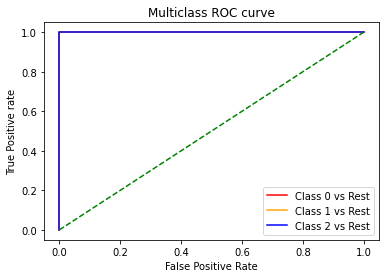

In [89]:
fpr = {}
tpr = {}
thresh ={}
n_class = df_FS['BINNED_TOT_ENROLL'].nunique()
classes = nb.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_NB[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_NB[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Create Random Forest Classifier

In [90]:
rf = RandomForestClassifier(random_state=1, n_estimators=1000, max_depth=5)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)
    
prob_RF = rf.predict_proba(X_test)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=rf.predict(X_test))
print(sk_report)

Accuracy on training set: 1.000
Accuracy on test set: 1.000
Mjority classifier Confusion Matrix
 [[1570    0    0]
 [   0 1558    0]
 [   0    0 1510]]
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      1570
           1   1.000000  1.000000  1.000000      1558
           2   1.000000  1.000000  1.000000      1510

    accuracy                       1.000000      4638
   macro avg   1.000000  1.000000  1.000000      4638
weighted avg   1.000000  1.000000  1.000000      4638



Class 0 ROC AUC OvR: 1.0000
Class 1 ROC AUC OvR: 1.0000
Class 2 ROC AUC OvR: 1.0000
Average ROC AUC OvR: 1.0000


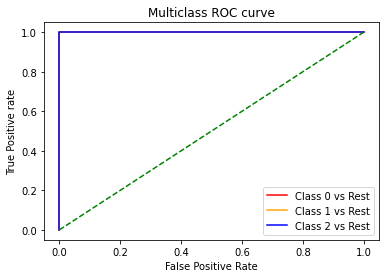

In [91]:
fpr = {}
tpr = {}
thresh ={}
n_class = df_FS['BINNED_TOT_ENROLL'].nunique()
classes = rf.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_RF[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_RF[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")

# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Create K-Nearest Neighbors Classifier

In [92]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)

# Calculate the overall accuracy on test set 

print("Accuracy on training set: {:.3f}".format(KNN.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(KNN.score(X_test, y_test)))

confusion_majority = confusion_matrix(y_test, y_pred)

print('Mjority classifier Confusion Matrix\n', confusion_majority)

prob_KNN = KNN.predict_proba(X_test)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=KNN.predict(X_test))
print(sk_report)

Accuracy on training set: 1.000
Accuracy on test set: 1.000
Mjority classifier Confusion Matrix
 [[1570    0    0]
 [   0 1557    1]
 [   0    0 1510]]
              precision    recall  f1-score   support

           0   1.000000  1.000000  1.000000      1570
           1   1.000000  0.999358  0.999679      1558
           2   0.999338  1.000000  0.999669      1510

    accuracy                       0.999784      4638
   macro avg   0.999779  0.999786  0.999783      4638
weighted avg   0.999785  0.999784  0.999784      4638



Class 0 ROC AUC OvR: 1.0000
Class 1 ROC AUC OvR: 0.9997
Class 2 ROC AUC OvR: 0.9998
Average ROC AUC OvR: 0.9998


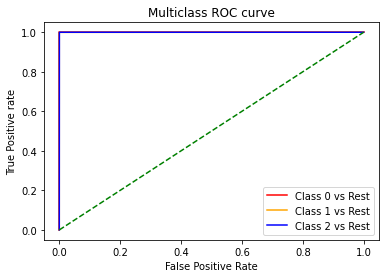

In [93]:
fpr = {}
tpr = {}
thresh ={}
n_class = df_FS['BINNED_TOT_ENROLL'].nunique()
classes = KNN.classes_
roc_auc_ovr = {}

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, prob_KNN[:,i], pos_label=i)
    c = classes[i]
    df_aux = X_test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = prob_KNN[:, i]
    df_aux = df_aux.reset_index(drop = True)
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])

avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    print(f"Class {k} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"Average ROC AUC OvR: {avg_roc_auc/i:.4f}")
    
# plotting    
plt.plot(fpr[0], tpr[0], color='red', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], color='orange', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], color='blue', label='Class 2 vs Rest')
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

### Classification models prediction

In [94]:
newData = pd.DataFrame({
    'TOT_EMPLOY':[83],
    'FT_ENROLL':[263],
    'PT_ENROLL':[219],
    'INST_SIZE':[2],
    'POPULATION':[557],
    'NAME':[2964],
    'STFIPS':[35],
    'COUNTYFIPS':[960],
    'TELEPHONE':[3783],
    'STATE':[40]
})

newData

,TOT_EMPLOY,FT_ENROLL,PT_ENROLL,INST_SIZE,POPULATION,NAME,STFIPS,COUNTYFIPS,TELEPHONE,STATE
0,83,263,219,2,557,2964,35,960,3783,40


In [95]:
d['BINNED_TOT_ENROLL'].inverse_transform(nb.predict(newData))

array(['Low'], dtype=object)

### Causal Question

**“Will an increase in the size of institutions increase the total enrollment of students of colleges and universities in the US?”**

In [96]:
df2 = df.copy()
filter = df2['INST_SIZE'] > 0
df2 = df2[filter]
df2.head()

,IPEDSID,NAME,ADDRESS,CITY,STATE,ZIP,POPULATION,COUNTY,COUNTYFIPS,COUNTRY,...,LONGITUDE,NAICS_CODE,NAICS_DESC,STFIPS,INST_SIZE,PT_ENROLL,FT_ENROLL,TOT_ENROLL,TOT_EMPLOY,BINNED_TOT_ENROLL
0,107840,Shorter College,604 Locust St,N Little Rock,AR,72114,70,Pulaski,5119,US,...,-92.260490,611210,Junior Colleges,5,1,24,28,52,18,Low
1,112181,Citrus Heights Beauty College,7518 Baird Way,Citris Heights,CA,95610,39,Sacramento,6067,US,...,-121.289431,611511,Cosmetology and Barber Schools,6,1,6,24,30,9,Low
2,116660,Joe Blasco Makeup Artist Training Center,1670 Hillhurst Avenue,Los Angeles,CA,90027,35,Los Angeles,6037,US,...,-118.287070,611511,Cosmetology and Barber Schools,6,1,0,24,24,11,Low
3,125310,Waynes College of Beauty,1271 North Main Street,Salinas,CA,93906,43,Monterey,6053,US,...,-121.652662,611511,Cosmetology and Barber Schools,6,1,18,16,34,9,Low
4,164368,Hult International Business School,1 Education Street,Cambridge,MA,02141,2386,Middlesex,25017,US,...,-71.070737,611310,"Colleges, Universities, and Professional Schools",25,2,0,2243,2243,143,Low


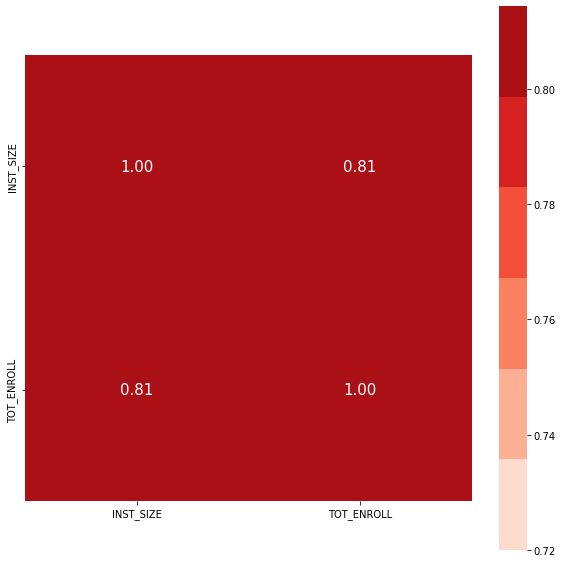

In [97]:
corr_list = list(['INST_SIZE', 'TOT_ENROLL'])
corr = df2[corr_list].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr , vmax=.8, square=True, annot=True, fmt= '.2f', annot_kws={'size': 15}, cmap=sns.color_palette("Reds")).figure.savefig('Heatmap3.png')

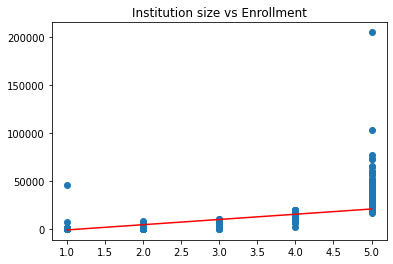

In [98]:
plt.scatter(df2['INST_SIZE'],df2['TOT_ENROLL'])
plt.plot(np.unique(df2['INST_SIZE']), np.poly1d(np.polyfit(df2['INST_SIZE'], df2['TOT_ENROLL'], 1))
         (np.unique(df2['INST_SIZE'])), color='red')
plt.title('Institution size vs Enrollment').figure.savefig('Inst_vs_Enrollment_Regplot.png')